In [36]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
#한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)
df=pd.read_csv("/home/piai/바탕화면/df.csv",encoding="cp949")

# 23년도 월별 예상도

In [133]:
sum=pd.DataFrame(df.groupby("SalesYearMonth").agg('sum')["Price"]).reset_index()
sum.head()

,SalesYearMonth,Price
0,2020-01,45693140
1,2020-02,35603970
2,2020-03,51538520
3,2020-04,57107850
4,2020-05,65530860


In [134]:
sum.rename(columns={'SalesYearMonth':'ds','Price':'y'}, inplace=True)

In [135]:
import pandas as pd
from prophet import Prophet

In [136]:
m = Prophet()
m.fit(sum)

16:58:32 - cmdstanpy - INFO - Chain [1] start processing
16:58:32 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2020-01-01
1,2020-02-01
2,2020-03-01
3,2020-04-01
4,2020-05-01


In [138]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
384,2022-11-27,9.217827e+07,7.783566e+07,1.065091e+08
385,2022-11-28,9.221507e+07,7.720156e+07,1.071212e+08
386,2022-11-29,9.225187e+07,7.703374e+07,1.060839e+08
387,2022-11-30,9.228867e+07,7.774219e+07,1.067420e+08
388,2022-12-01,9.232547e+07,7.695453e+07,1.073951e+08


forecast.to_excel("/home/piai/바탕화면/forecast.xlsx",encoding="cp949")

In [139]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
384,2022-11-27,9.217827e+07,7.770231e+07,1.066462e+08,9.217826e+07,9.217827e+07,0.0,0.0,0.0,0.0,0.0,0.0,9.217827e+07
385,2022-11-28,9.221507e+07,7.672104e+07,1.060073e+08,9.221506e+07,9.221507e+07,0.0,0.0,0.0,0.0,0.0,0.0,9.221507e+07
386,2022-11-29,9.225187e+07,7.831151e+07,1.064391e+08,9.225187e+07,9.225187e+07,0.0,0.0,0.0,0.0,0.0,0.0,9.225187e+07
387,2022-11-30,9.228867e+07,7.757379e+07,1.060994e+08,9.228867e+07,9.228867e+07,0.0,0.0,0.0,0.0,0.0,0.0,9.228867e+07
388,2022-12-01,9.232547e+07,7.825051e+07,1.063017e+08,9.232547e+07,9.232547e+07,0.0,0.0,0.0,0.0,0.0,0.0,9.232547e+07


In [140]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
329,2022-10-03,9.015422e+07,7.610856e+07,1.050542e+08
330,2022-10-04,9.019102e+07,7.637882e+07,1.038286e+08
331,2022-10-05,9.022782e+07,7.559840e+07,1.059435e+08
332,2022-10-06,9.026462e+07,7.642911e+07,1.052603e+08
333,2022-10-07,9.030142e+07,7.407632e+07,1.049588e+08
334,2022-10-08,9.033822e+07,7.491167e+07,1.044956e+08
335,2022-10-09,9.037502e+07,7.562560e+07,1.042818e+08
336,2022-10-10,9.041182e+07,7.545646e+07,1.042879e+08
337,2022-10-11,9.044862e+07,7.535909e+07,1.042067e+08
338,2022-10-12,9.048542e+07,7.679778e+07,1.050682e+08


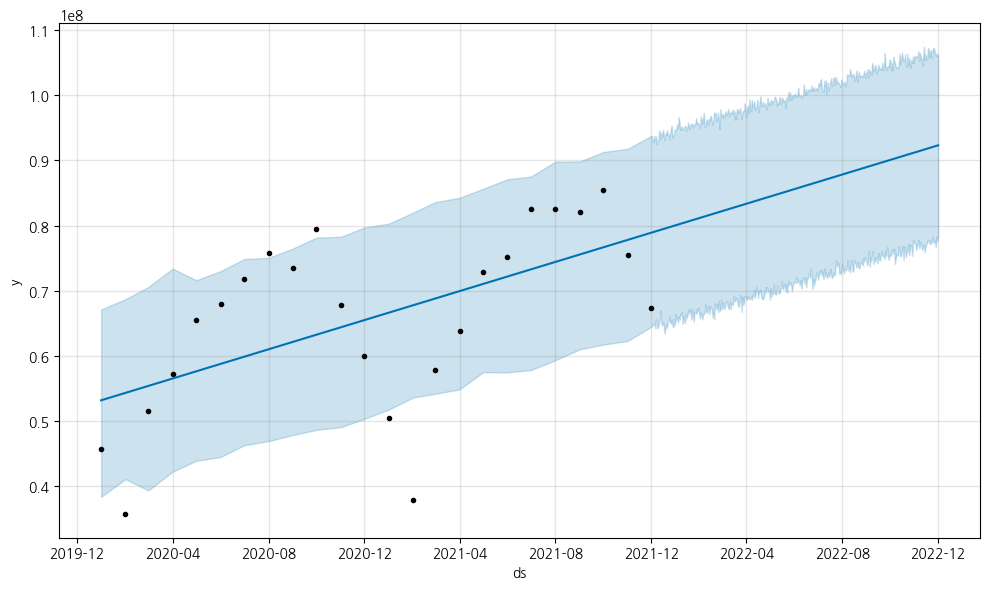

In [141]:
 fig1 = m.plot(forecast)

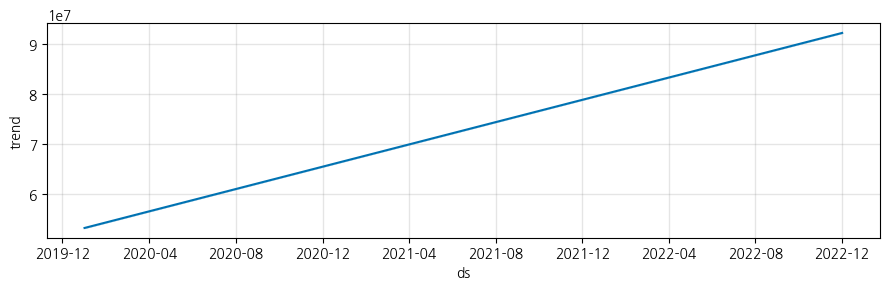

In [142]:
fig2 = m.plot_components(forecast)

# 23년도 일별 예상해보자

In [143]:
sum=pd.DataFrame(df.groupby("SalesDate").agg('sum')["Price"]).reset_index()
sum.head()

,SalesDate,Price
0,2020-01-01,1330720
1,2020-01-02,1516550
2,2020-01-03,1904650
3,2020-01-04,1214820
4,2020-01-05,775400


In [144]:
sum.rename(columns={'SalesDate':'ds','Price':'y'}, inplace=True)

16:58:36 - cmdstanpy - INFO - Chain [1] start processing
16:58:36 - cmdstanpy - INFO - Chain [1] done processing


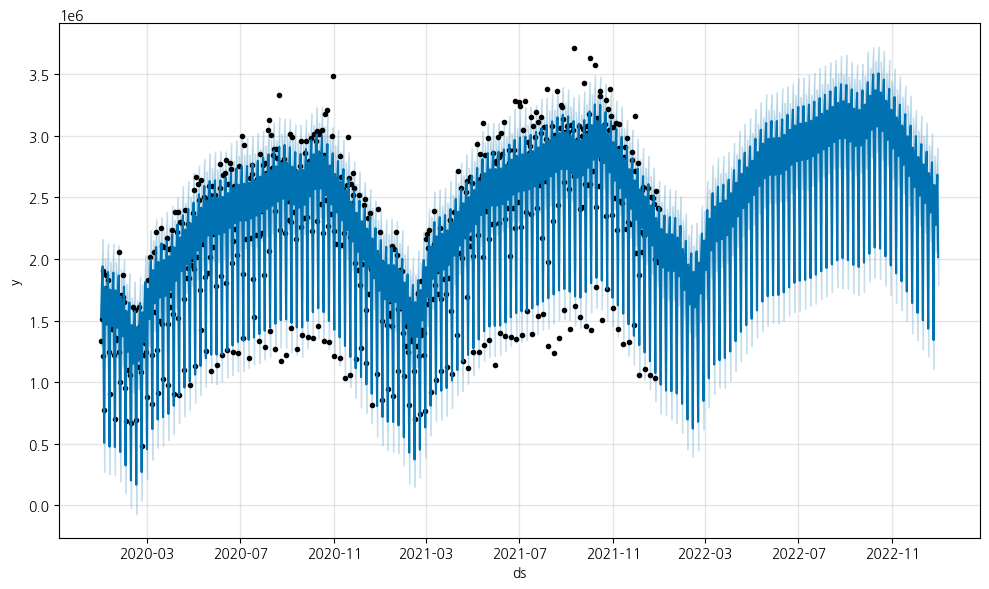

In [145]:
m = Prophet()
m.fit(sum)
future = m.make_future_dataframe(periods=365)
future.head()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast = m.predict(future)
forecast.tail()
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)
fig1 = m.plot(forecast)

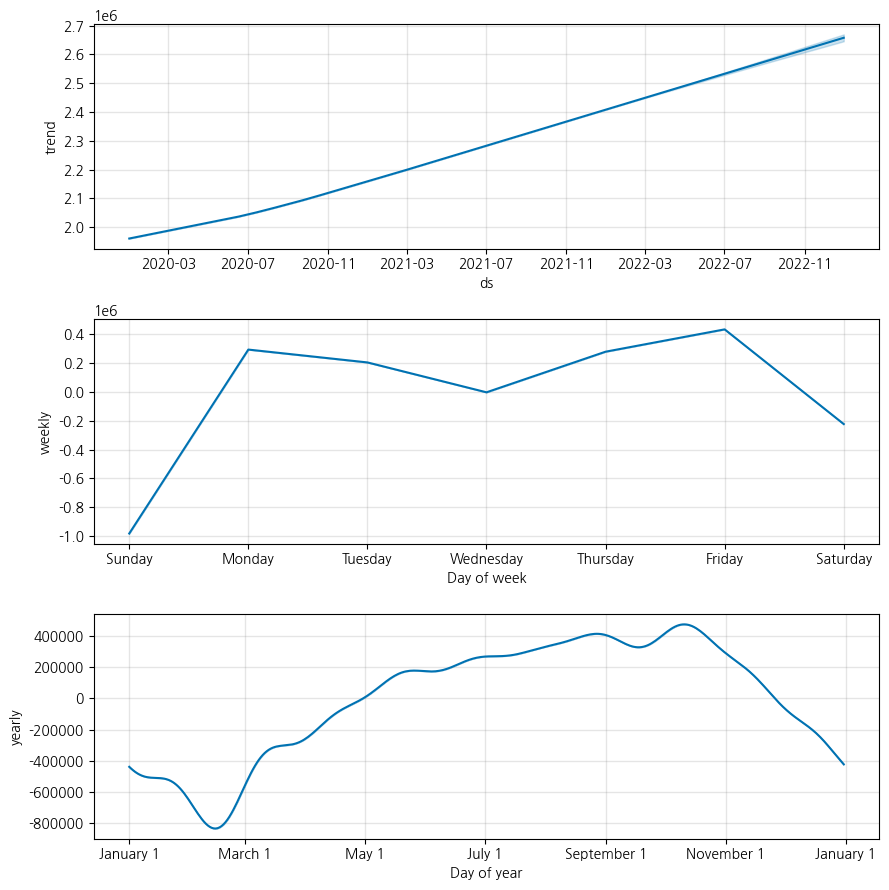

In [146]:
fig2 = m.plot_components(forecast)